<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [297]:
# import libraries

In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [2]:
# read data and check how many class in train set

In [3]:
pwd

'C:\\Users\\muslu\\PYTHON\\Python Modul_3\\Deep Learning\\project'

In [4]:
my_data_dir = 'C:\\Users\\muslu\\PYTHON\\Python Modul_3\\Deep Learning\\project\\datasets'

In [5]:
os.listdir(my_data_dir) 

['test', 'train', 'validation']

In [6]:
test_path = my_data_dir + '/test/'
train_path = my_data_dir + '/train/'
validation_path = my_data_dir + '/validation/'

In [7]:
os.listdir(train_path)

['cat', 'dog']

In [8]:
len(os.listdir(test_path))

6897

In [9]:
os.listdir(train_path + "cat")

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [10]:
os.listdir(train_path + "cat")[5]

'cat.10000.jpg'

In [11]:
para_cell = train_path+'cat'+'/cat.10000.jpg'

In [12]:
imread(para_cell)

array([[[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[ 77,  13,   3],
        [ 83,  19,  10],
        [ 84,  20,  18],
        ...,
        [ 23,   9,   9],
        [ 24,   8,   9],
        [ 24,   8,   9]],

       [[ 79,  17,   4],
        [ 86,  24,  13],
        [ 88,  25,  20],
        ...,
        [ 20,   8,   8],
        [ 20,   8,   8],
        [ 22,   8,   8]],

       [[ 94,  32,  17],
        [103,  41,  30],
        [100,  39,  34],
        ...,
        [ 17,   9,   7],
        [ 18,   8,   7],
        [ 19,   7,   7]]

In [13]:
para_img= imread(para_cell)

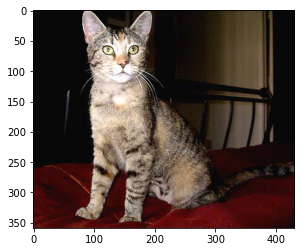

In [14]:
plt.imshow(para_img)

In [15]:
para_img.shape

(359, 431, 3)

In [16]:
os.listdir(train_path +"dog")

['2462.jpg',
 '2464.jpg',
 '2465.jpg',
 '2466.jpg',
 '2467.jpg',
 '2468.jpg',
 '2469.jpg',
 '2470.jpg',
 '2471.jpg',
 '2472.jpg',
 '2474.jpg',
 '2476.jpg',
 '2478.jpg',
 '2481.jpg',
 '2482.jpg',
 '2483.jpg',
 '2484.jpg',
 '2487.jpg',
 '2489.jpg',
 '2490.jpg',
 '2491.jpg',
 '2494.jpg',
 '2498.jpg',
 '2504.jpg',
 '2505.jpg',
 '2506.jpg',
 '2507.jpg',
 '2509.jpg',
 '2510.jpg',
 '2511.jpg',
 '2514.jpg',
 '2515.jpg',
 '2518.jpg',
 '2520.jpg',
 '2521.jpg',
 '2523.jpg',
 '2525.jpg',
 '2527.jpg',
 '2529.jpg',
 '2532.jpg',
 '2533.jpg',
 '2537.jpg',
 '2539.jpg',
 '2541.jpg',
 '2543.jpg',
 '2544.jpg',
 '2546.jpg',
 '2547.jpg',
 '2552.jpg',
 '2555.jpg',
 '2556.jpg',
 '2559.jpg',
 '2560.jpg',
 '2561.jpg',
 '2562.jpg',
 '2566.jpg',
 '2568.jpg',
 '2569.jpg',
 '2570.jpg',
 '2573.jpg',
 '2575.jpg',
 '2577.jpg',
 '2579.jpg',
 '2581.jpg',
 '2582.jpg',
 '2583.jpg',
 '2589.jpg',
 '2590.jpg',
 '2594.jpg',
 '2598.jpg',
 '2599.jpg',
 '2600.jpg',
 '2601.jpg',
 '2602.jpg',
 '2606.jpg',
 '2609.jpg',
 '2612.jpg',

In [17]:
os.listdir(train_path +"dog")[7]

'2470.jpg'

In [18]:
dog_para_cell = train_path+'dog'+'/2470.jpg'

In [19]:
imread(dog_para_cell)

array([[[196, 170, 171],
        [191, 165, 168],
        [198, 172, 175],
        ...,
        [211, 195, 182],
        [208, 194, 181],
        [206, 194, 180]],

       [[206, 180, 181],
        [204, 178, 179],
        [207, 181, 184],
        ...,
        [203, 187, 174],
        [200, 186, 173],
        [197, 185, 171]],

       [[201, 175, 174],
        [199, 173, 174],
        [208, 182, 183],
        ...,
        [197, 181, 168],
        [194, 180, 167],
        [190, 178, 162]],

       ...,

       [[243, 210, 167],
        [247, 214, 169],
        [250, 218, 171],
        ...,
        [244, 210, 175],
        [246, 214, 175],
        [247, 218, 174]],

       [[248, 215, 172],
        [250, 217, 172],
        [250, 218, 171],
        ...,
        [249, 214, 182],
        [253, 221, 183],
        [255, 228, 186]],

       [[250, 221, 165],
        [250, 221, 165],
        [252, 221, 167],
        ...,
        [240, 208, 159],
        [249, 219, 167],
        [255, 228, 175]]

In [20]:
dog_para_img= imread(dog_para_cell)

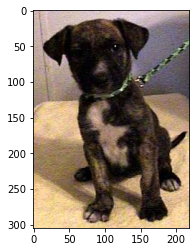

In [21]:
plt.imshow(dog_para_img)

In [22]:
dog_para_img.shape

(305, 219, 3)

**Let's check how many images there are.**

In [23]:
#number of cat images in train set

In [24]:
len(os.listdir(train_path+"cat"))

12500

In [25]:
#number of dog images in train set

In [26]:
len(os.listdir(train_path + "dog"))

5026

In [27]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes


In [28]:
os.listdir(train_path+'cat')[0]

'cat.0.jpg'

In [29]:
os.listdir(train_path+'dog')[1]

'2464.jpg'

In [30]:
cat = train_path+'/cat'+'/cat.0.jpg'
dog = train_path+'/dog'+'/dog.1.jpg'

In [31]:
cat = imread(cat)
dog = imread(dog)

In [32]:
#show cat image

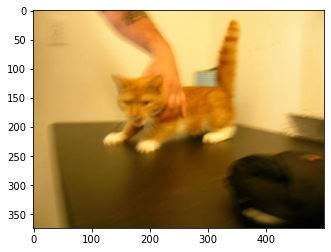

In [33]:
plt.imshow(cat)

In [34]:
#show dog image

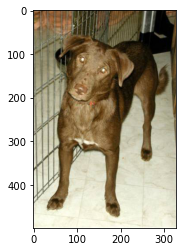

In [35]:
plt.imshow(dog)

**Let's decide on the final dimension of these images.**

In [36]:
dog.shape

(499, 327, 3)

In [37]:
cat.shape

(374, 500, 3)

In [38]:
x= []
y = []
for image in os.listdir(train_path+'cat'):
    
    img = imread(train_path+'cat\\'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<IPython.core.display.Javascript object>

<AxesSubplot:>

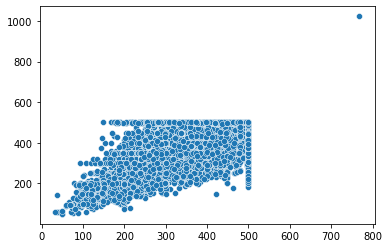

In [39]:
sns.scatterplot(data =os.listdir(train_path+'cat'), x = x, y=y)

In [40]:
np.mean(x)

356.46712

In [41]:
np.mean(y)

410.52264

In [42]:
x= []
y = []
for image in os.listdir(train_path+'dog'):
    
    img = imread(train_path+'dog\\'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

In [43]:
np.mean(x)

365.0505372065261

In [44]:
np.mean(y)

398.9930362116992

<IPython.core.display.Javascript object>

<AxesSubplot:>

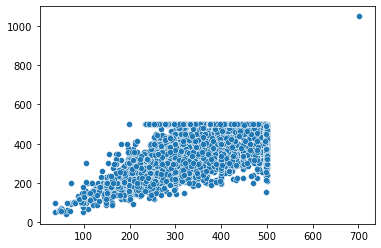

In [45]:
sns.scatterplot(data =os.listdir(train_path+'cat'), x = x, y=y)

In [46]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [47]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [48]:
#use ImageDataGenerator to manipulate the images

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
#instantiate the ImageDataGenerator class
image_gen = ImageDataGenerator(rotation_range=20,  
                               width_shift_range=0.10,  
                               height_shift_range=0.10,  
                               rescale=1/255,  
                               shear_range=0.1,  
                               zoom_range=0.1, 
                               horizontal_flip=True,  
                               fill_mode='nearest' 
                              )

In [51]:
#show transfromed version of dog image

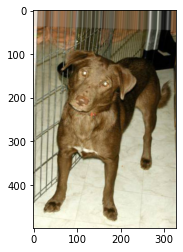

In [52]:
plt.imshow(image_gen.random_transform(dog))

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [53]:
# image_gen.flow_from_directory(val_path)

In [55]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [56]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [57]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


# Creating the Model

In [353]:
#create your CNN model here

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [59]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

## Early Stopping

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [63]:
batch_size = 16

In [64]:
#use image_gen from above and read iamges from train and test set

In [65]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 17526 images belonging to 2 classes.


In [66]:
val_image_gen = image_gen.flow_from_directory(validation_path ,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2290 images belonging to 2 classes.


In [67]:
test_image_gen = image_gen.flow_from_directory(test_path ,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 0 images belonging to 0 classes.


In [68]:
#show class indices in train set

In [69]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [70]:
test_image_gen.class_indices

{}

In [71]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=val_image_gen, callbacks=[early_stop])

Epoch 1/10
1096/1096 [==============================] - 306s 279ms/step - loss: 0.5936 - accuracy: 0.7178 - val_loss: 0.6788 - val_accuracy: 0.5655
Epoch 2/10
1096/1096 [==============================] - 289s 264ms/step - loss: 0.5207 - accuracy: 0.7530 - val_loss: 0.5496 - val_accuracy: 0.7297
Epoch 3/10
1096/1096 [==============================] - 287s 262ms/step - loss: 0.4772 - accuracy: 0.7784 - val_loss: 0.5863 - val_accuracy: 0.7227
Epoch 4/10
1096/1096 [==============================] - 289s 264ms/step - loss: 0.4452 - accuracy: 0.7972 - val_loss: 0.5321 - val_accuracy: 0.7297
Epoch 5/10
1096/1096 [==============================] - 297s 271ms/step - loss: 0.4303 - accuracy: 0.8062 - val_loss: 0.6012 - val_accuracy: 0.6882
Epoch 6/10
1096/1096 [==============================] - 285s 260ms/step - loss: 0.4124 - accuracy: 0.8168 - val_loss: 0.5763 - val_accuracy: 0.7297
Epoch 7/10
1096/1096 [==============================] - 288s 262ms/step - loss: 0.3952 - accuracy: 0.8265 - val_

# Evaluating the Model

In [74]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.593635,0.717848,0.678817,0.565502
1,0.520701,0.752996,0.549631,0.729694
2,0.477229,0.778443,0.586334,0.722707
3,0.445203,0.797216,0.532134,0.729694
4,0.430254,0.806231,0.601248,0.688210


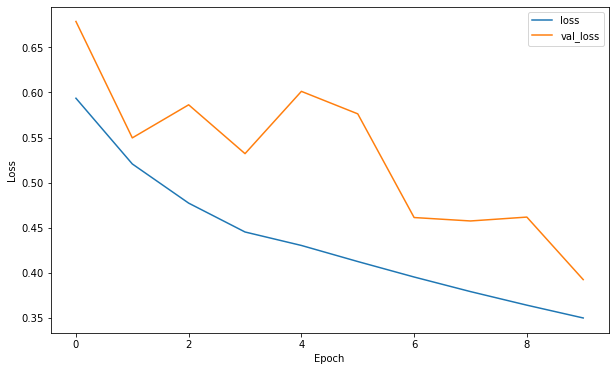

In [75]:
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

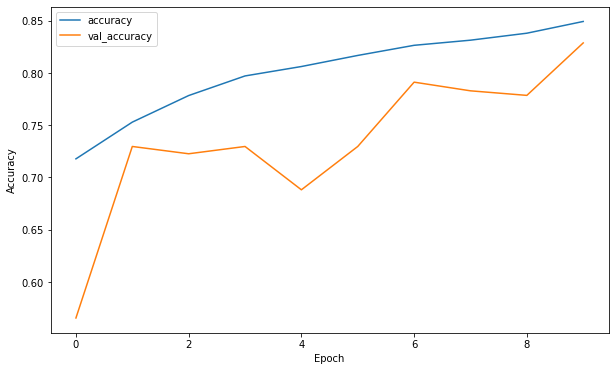

In [76]:
plt.figure(figsize=(10,6))                       
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [77]:
model.metrics_names

['loss', 'accuracy']

In [78]:
model.evaluate_generator(val_image_gen)

[0.39098629355430603, 0.8292576670646667]

In [79]:
from tensorflow.keras.preprocessing import image

In [80]:
pred_probabilities = model.predict_generator(val_image_gen)

In [81]:
pred_probabilities

array([[0.00963047],
       [0.33412513],
       [0.42926216],
       ...,
       [0.9573986 ],
       [0.95804274],
       [0.8778509 ]], dtype=float32)

In [82]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
predictions = pred_probabilities > 0.5

In [84]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1219
           1       0.85      0.76      0.80      1071

    accuracy                           0.83      2290
   macro avg       0.83      0.82      0.82      2290
weighted avg       0.83      0.83      0.82      2290



In [120]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1079,  140],
       [ 260,  811]], dtype=int64)

In [121]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1079,  140],
       [ 260,  811]], dtype=int64)

In [124]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [123]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [125]:
model=load_model('cat_dog_detector.h5')

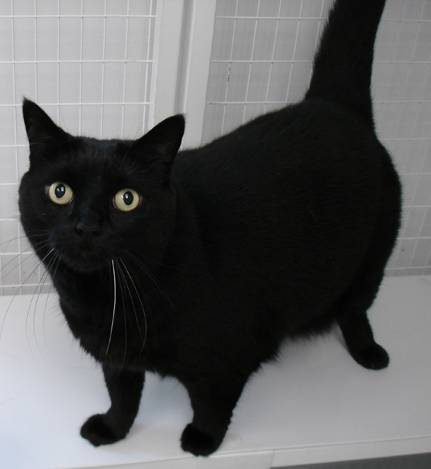

In [126]:
#read 2749.jpg from test set

my_image = image.load_img(test_path+"/2749.jpg") 
my_image   

In [147]:
#read 2749.jpg from test set
my_image = image.load_img(test_path+"/2749.jpg", target_size=image_shape)    

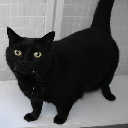

In [148]:
my_image

In [149]:
my_image = image.img_to_array(my_image) # convert the image into numpy array
my_image.shape

(128, 128, 3)

In [152]:
res_my_image = np.expand_dims(my_image, axis=0)
res_my_image.shape

(1, 128, 128, 3)

In [153]:
#predict the image class with your model

prediction = model.predict(res_my_image)
prediction

array([[1.]], dtype=float32)

In [154]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [155]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}